In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
plt.rcParams['figure.dpi']=70
plt.rcParams['savefig.dpi']=300

In [2]:
import seaborn as sns
#settings
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, "savefig.dpi":300})
sns.set_context("notebook")

In [3]:
data0 = pd.read_csv("DATA.csv")

In [4]:
network_data = data0.drop_duplicates(['entity_id','dcterms_creator','entity_type'], keep='first')

network_data.head()

,entity_id,entity_type,appearsInJournal,rank_P,referenceCount_P,appearsInConferenceInstance,citationCount_P,entity_idF,fos_list,dcterms_creator,...,citationCount_CI,entity_id_C,rank_C,paperCount_C,citationCount_CS,entity_id_CS,rank_J,paperCount_J,citationCount_J,entity_id_J
0,6320,NaN,NaN,24657,1,NaN,0,2778716859,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,139580,NaN,NaN,24050,5,NaN,0,3017626604,Medicine,1.852443e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,186380,JournalArticle,2.501223e+09,23892,0,NaN,3,90924648,Medicine,2.095945e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,10274.0,6928.0,21655.0,2.501223e+09
12,186380,JournalArticle,2.501223e+09,23892,0,NaN,3,90924648,Medicine,2.137510e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,10274.0,6928.0,21655.0,2.501223e+09
13,186380,JournalArticle,2.501223e+09,23892,0,NaN,3,90924648,Medicine,2.142913e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,10274.0,6928.0,21655.0,2.501223e+09


In [5]:
Paper_Auth_Num = network_data['entity_id'].value_counts().rename_axis('entity_id').reset_index(name='Paper_Auth_Num')
Paper_Auth_Num.head()

,entity_id,Paper_Auth_Num
0,5889370,374
1,245130620,151
2,6392330,104
3,607077360,91
4,94870250,64


In [6]:
data = pd.merge(network_data,Paper_Auth_Num,how="left")

In [7]:
data['Cite_per_P'] = data.citationCount_A / data.paperCount_A

In [8]:
print(data.shape)
data.head()

(117363, 30)


,entity_id,entity_type,appearsInJournal,rank_P,referenceCount_P,appearsInConferenceInstance,citationCount_P,entity_idF,fos_list,dcterms_creator,...,rank_C,paperCount_C,citationCount_CS,entity_id_CS,rank_J,paperCount_J,citationCount_J,entity_id_J,Paper_Auth_Num,Cite_per_P
0,6320,NaN,NaN,24657,1,NaN,0,2778716859,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17.600000
1,139580,NaN,NaN,24050,5,NaN,0,3017626604,Medicine,1.852443e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17.737805
2,186380,JournalArticle,2.501223e+09,23892,0,NaN,3,90924648,Medicine,2.095945e+09,...,NaN,NaN,NaN,NaN,10274.0,6928.0,21655.0,2.501223e+09,11,2.333333
3,186380,JournalArticle,2.501223e+09,23892,0,NaN,3,90924648,Medicine,2.137510e+09,...,NaN,NaN,NaN,NaN,10274.0,6928.0,21655.0,2.501223e+09,11,2.333333
4,186380,JournalArticle,2.501223e+09,23892,0,NaN,3,90924648,Medicine,2.142913e+09,...,NaN,NaN,NaN,NaN,10274.0,6928.0,21655.0,2.501223e+09,11,1.250000


In [9]:
#Paper_Auth_Num = data0['entity_id'].value_counts().rename_axis('entity_id').reset_index(name='Paper_Auth_Num')
#Paper_Auth_Num.head()

In [10]:
#data = pd.merge(data0,Paper_Auth_Num,how="left")

In [11]:
#data['Cite_per_P'] = data.citationCount_A / data.paperCount_A

In [12]:
#print(data.shape)
#data.head()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117363 entries, 0 to 117362
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   entity_id                    117363 non-null  int64  
 1   entity_type                  60766 non-null   object 
 2   appearsInJournal             43939 non-null   float64
 3   rank_P                       117363 non-null  int64  
 4   referenceCount_P             117363 non-null  int64  
 5   appearsInConferenceInstance  1202 non-null    float64
 6   citationCount_P              117363 non-null  int64  
 7   entity_idF                   117363 non-null  int64  
 8   fos_list                     117363 non-null  object 
 9   dcterms_creator              117363 non-null  float64
 10  entity_id_A                  117363 non-null  float64
 11  rank_A                       117363 non-null  float64
 12  paperCount_A                 117363 non-null  float64
 13 

# Author Network

In [14]:
#FIND NUMBER OF UNIQUE CO_AUTHORS
df = data #
auth = data[data.columns[[0,8,9,11,12,13,20,24,29]]]
df = df.join(df.groupby('entity_id')['dcterms_creator'].apply(set).rename('new'), 'entity_id')

df['new'] = [b - set([a]) for a, b in zip(df['dcterms_creator'], df['new'])]

df = (df[df['new'].astype(bool)].groupby('dcterms_creator')['new']
          .apply(lambda x: tuple(set([z for y in x for z in y])))
          .to_frame())

df.insert(0, 'Num_Unique_CoAuthors', df['new'].str.len())

auth_uniq = pd.DataFrame(df,index=None)
auth_uniq.reset_index(inplace=True)

print(auth_uniq.shape)
auth_uniq.head()

(86076, 3)


,dcterms_creator,Num_Unique_CoAuthors,new
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280..."
1,758859.0,2,"(2132930452.0, 2110535015.0)"
2,1011029.0,5,"(2041291329.0, 2144823554.0, 2133763109.0, 302..."
3,1341902.0,1,"(2614587889.0,)"
4,1792001.0,9,"(2764590720.0, 2126783685.0, 191893929.0, 1941..."


In [15]:
s = auth_uniq.apply(lambda x: pd.Series(x['new']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'coauth'
s.head()
#auth_uniq.drop('new', axis=1).join(s)

0    2.620315e+09
0    3.012604e+09
0    2.114906e+09
0    2.806220e+09
0    2.129303e+09
Name: coauth, dtype: float64

In [16]:
s = pd.DataFrame(s)
s.head()
auth_net = auth_uniq.join(s);
auth_net.head()

,dcterms_creator,Num_Unique_CoAuthors,new,coauth
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.620315e+09
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",3.012604e+09
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.114906e+09
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.806220e+09
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.129303e+09


In [17]:
rank = data[data.columns[[6,8,9,11,12,13,28,29]]]
rank.head()


,citationCount_P,fos_list,dcterms_creator,rank_A,paperCount_A,citationCount_A,Paper_Auth_Num,Cite_per_P
0,0,Medicine,2.700171e+09,21021.0,45.0,792.0,1,17.600000
1,0,Medicine,1.852443e+09,21075.0,328.0,5818.0,1,17.737805
2,3,Medicine,2.095945e+09,19655.0,3.0,7.0,11,2.333333
3,3,Medicine,2.137510e+09,19655.0,3.0,7.0,11,2.333333
4,3,Medicine,2.142913e+09,18821.0,8.0,10.0,11,1.250000


In [18]:
rank_net = pd.merge(auth_net,rank,how="left",left_on="dcterms_creator",right_on='dcterms_creator')
rank_net.drop_duplicates();

In [19]:
x = rank_net['dcterms_creator'].tolist()
y = rank_net['coauth'].tolist()
p = []
for val in range(len(x)):
    p.append((x[val], y[val]))

rank_net["Connections"] = p
rank_net.head(3)

,dcterms_creator,Num_Unique_CoAuthors,new,coauth,citationCount_P,fos_list,rank_A,paperCount_A,citationCount_A,Paper_Auth_Num,Cite_per_P,Connections
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.620315e+09,6,Geology,15554.0,121.0,1555.0,6,12.85124,"(400978.0, 2620315329.0)"
1,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.620315e+09,0,Geography,15554.0,121.0,1555.0,4,12.85124,"(400978.0, 2620315329.0)"
2,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",3.012604e+09,6,Geology,15554.0,121.0,1555.0,6,12.85124,"(400978.0, 3012604226.0)"


In [20]:
counts = pd.DataFrame(rank_net['Connections'].value_counts(), index=None)

In [21]:
counts.reset_index(inplace=True)
counts = counts.rename(columns = {'index':'Pair'})

counts.head(3)

,Pair,Connections
0,"(2421977158.0, 2688546657.0)",3
1,"(2636336334.0, 2713700737.0)",3
2,"(2186413521.0, 2250931522.0)",3


In [22]:
rank_net = pd.merge(counts, rank_net, how='left',left_on='Pair',right_on='Connections')
rank_net.pop('Connections_y')
rank_net = rank_net.rename(columns = {'Connections_x':'Collab_Num'})

rank_net.head()

,Pair,Collab_Num,dcterms_creator,Num_Unique_CoAuthors,new,coauth,citationCount_P,fos_list,rank_A,paperCount_A,citationCount_A,Paper_Auth_Num,Cite_per_P
0,"(2421977158.0, 2688546657.0)",3,2.421977e+09,16,"(2429004576.0, 2146190049.0, 2568163170.0, 268...",2.688547e+09,1,Geology,21075.0,787.0,21024.0,10,26.714104
1,"(2421977158.0, 2688546657.0)",3,2.421977e+09,16,"(2429004576.0, 2146190049.0, 2568163170.0, 268...",2.688547e+09,2,Geology,21075.0,787.0,21024.0,6,26.714104
2,"(2421977158.0, 2688546657.0)",3,2.421977e+09,16,"(2429004576.0, 2146190049.0, 2568163170.0, 268...",2.688547e+09,23,Geology,21075.0,787.0,21024.0,3,26.714104
3,"(2636336334.0, 2713700737.0)",3,2.636336e+09,8,"(2713700737.0, 2147698755.0, 2604040936.0, 214...",2.713701e+09,9,Environmental science,21075.0,702.0,36506.0,5,52.002849
4,"(2636336334.0, 2713700737.0)",3,2.636336e+09,8,"(2713700737.0, 2147698755.0, 2604040936.0, 214...",2.713701e+09,4,Business,21075.0,702.0,36506.0,3,52.002849


In [23]:
pip install decorator==5.0.9

  Using cached decorator-5.0.9-py3-none-any.whl (8.9 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
Note: you may need to restart the kernel to use updated packages.


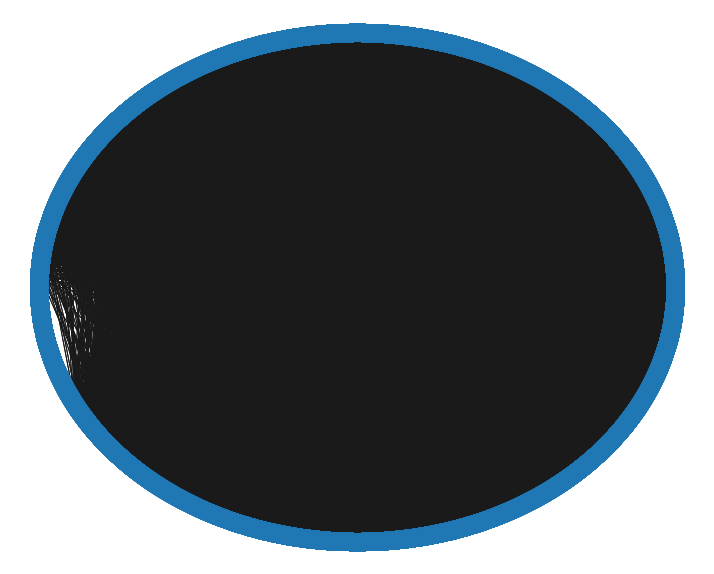

In [24]:
#from networkx.algorithms import community
from matplotlib.pyplot import figure

#node_names = [n for n in rank_net.dcterms_creator]
#edges = [e for e in rank_net.coauth]
#edges
#G = nx.Graph()
#G.add_nodes_from(node_names)
#G.add_edges_from(edges)

G = nx.from_pandas_edgelist(rank_net, 'dcterms_creator', 'coauth', edge_attr='Collab_Num')


#G.add_node(0, weight=8)
#G.add_node(1, weight=5)
#G.add_node(2, weight=3)
#labels = {n: G.nodes[n]['weight'] for n in G.nodes}
#colors = [G.nodes[n]['weight'] for n in G.nodes]
figure(figsize=(10, 8))

nx.draw_shell(G, with_labels=False)

In [25]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 86076
Number of edges: 253648
Average degree:   5.8936


In [26]:
edges_sort=sorted(G.edges(data=True), key=lambda t: t[2].get('Collab_Num', 1),reverse=True)
edges_sort[:10]

[(2421977158.0, 2983058681.0, {'Collab_Num': 3}),
 (2185745442.0, 2150076292.0, {'Collab_Num': 3}),
 (2421977158.0, 2988163426.0, {'Collab_Num': 2}),
 (2186413521.0, 2133138124.0, {'Collab_Num': 2}),
 (2338731310.0, 2985504076.0, {'Collab_Num': 2}),
 (2522066114.0, 2799270617.0, {'Collab_Num': 2}),
 (2560926773.0, 2324825424.0, {'Collab_Num': 2}),
 (2893385618.0, 2785959551.0, {'Collab_Num': 2}),
 (2420863549.0, 2949544441.0, {'Collab_Num': 2}),
 (2463869916.0, 2278996368.0, {'Collab_Num': 2})]

In [27]:
#print(nx.info(G))
density = nx.density(G)
print("Network density:", density)
print("Is the Network completely connected?:",nx.is_connected(G))

Network density: 6.847031560313396e-05
Is the Network completely connected?: False


In [ ]:
import networkx as nx
from matplotlib import pyplot as plt
#G = nx.Graph()
#G.add_edges_from([(1,2),(2,3),(1,3),(1,4),(5,6),(6,7),(7,8),(8,5),(9,10),(10,11)])
total = 0
number = 0
num=0
for i, c in enumerate(nx.connected_components(G)):
    if len(c) >= 10:
        print(f"Island {i+1}: {c}")
        total += len(c)
        number +=1
    num +=1
# THERE ARE 24,763 ISLANDS IN THE NETWORK

In [ ]:
total/number

In [ ]:
total, number

In [ ]:
num

###### IDEAS

1. Find the average author rank for each island
2. Find all centrality measurements

In [ ]:
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

In [ ]:
# DEGREE OF NODES

from operator import itemgetter

degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

In [ ]:
betweenness_dict = nx.betweenness_centrality(G,normalized = True,endpoints = False) # Run betweenness centrality
# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

In [ ]:
#Find the Nodes (Researchers) 
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by betweenness centrality:")
for b in sorted_betweenness[:10]:
    print(b)

In [ ]:
# EIGENVECTOR CENTRALITY OF NODES

eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

#Find the Nodes (Researchers) 
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by eigenvector centrality:")
for e in sorted_eigenvector[:5]:
    print(e)
    
#THE SAME THING AS DEGREE

In [ ]:
# Closeness CENTRALITY OF NODES

close_centrality = nx.closeness_centrality(G)
  
# Assign each to an attribute in your network
nx.set_node_attributes(G, close_centrality, 'close')

#Find the Nodes (Researchers) 
sorted_close = sorted(close_centrality.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by eigenvector centrality:")
for c in sorted_close[:5]:
    print(c)

In [ ]:
#Average number of connections that are connected to a friend (you both have a similar connection)
nx.average_clustering(G)

#About 74.5% of a nodes connections are connected to it's friends as well

In [ ]:
central = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
central.index.name='dcterms_creator'

central.head()

In [ ]:
#final = pd.merge(central,rank_net,how="left",left_on="dcterms_creator",right_on="dcterms_creator")
#final.info()

# FINAL DATASET

In [3]:
from sklearn.datasets import load_boston, load_diabetes, load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz

from IPython.display import Image
from six import StringIO

import pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import math
import seaborn as sns

In [4]:
refer = pd.read_csv('reference.csv')

In [5]:
final0 = pd.read_csv('Final.csv')
final0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516407 entries, 0 to 516406
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            516407 non-null  int64  
 1   dcterms_creator       516407 non-null  float64
 2   degree                516407 non-null  int64  
 3   betweenness           516407 non-null  float64
 4   eigenvector           516407 non-null  float64
 5   close                 516407 non-null  float64
 6   Pair                  516407 non-null  object 
 7   Collab_Num            516407 non-null  int64  
 8   Num_Unique_CoAuthors  516407 non-null  int64  
 9   new                   516407 non-null  object 
 10  coauth                516407 non-null  float64
 11  citationCount_P       516407 non-null  int64  
 12  fos_list              516407 non-null  object 
 13  rank_A                516407 non-null  float64
 14  paperCount_A          516407 non-null  float64
 15  

In [6]:
final = pd.merge(final0,refer,how='left',left_on='dcterms_creator',right_on='dcterms_creator')
final.head()

,Unnamed: 0,dcterms_creator,degree,betweenness,eigenvector,close,Pair,Collab_Num,Num_Unique_CoAuthors,new,coauth,citationCount_P,fos_list,rank_A,paperCount_A,citationCount_A,Paper_Auth_Num,Cite_per_P,referenceCount_P
0,0,2.421977e+09,16,6.343791e-08,4.010697e-11,0.000243,"(2421977158.0, 2688546657.0)",3,16,"(2429004576.0, 2146190049.0, 2568163170.0, 268...",2.688547e+09,1,Geology,21075.0,787.0,21024.0,10,26.714104,23
1,1,2.421977e+09,16,6.343791e-08,4.010697e-11,0.000243,"(2421977158.0, 2688546657.0)",3,16,"(2429004576.0, 2146190049.0, 2568163170.0, 268...",2.688547e+09,2,Geology,21075.0,787.0,21024.0,6,26.714104,23
2,2,2.421977e+09,16,6.343791e-08,4.010697e-11,0.000243,"(2421977158.0, 2688546657.0)",3,16,"(2429004576.0, 2146190049.0, 2568163170.0, 268...",2.688547e+09,23,Geology,21075.0,787.0,21024.0,3,26.714104,23
3,3,2.421977e+09,16,6.343791e-08,4.010697e-11,0.000243,"(2421977158.0, 2146190049.0)",3,16,"(2429004576.0, 2146190049.0, 2568163170.0, 268...",2.146190e+09,1,Geology,21075.0,787.0,21024.0,10,26.714104,23
4,4,2.421977e+09,16,6.343791e-08,4.010697e-11,0.000243,"(2421977158.0, 2146190049.0)",3,16,"(2429004576.0, 2146190049.0, 2568163170.0, 268...",2.146190e+09,2,Geology,21075.0,787.0,21024.0,6,26.714104,23


In [8]:
powerpoint = final[final.columns[[1,3,4,5,8,13,14,15,17,18]]]
powerpoint.head(11)

,dcterms_creator,betweenness,eigenvector,close,Num_Unique_CoAuthors,rank_A,paperCount_A,citationCount_A,Cite_per_P,referenceCount_P
0,2.421977e+09,6.343791e-08,4.010697e-11,0.000243,16,21075.0,787.0,21024.0,26.714104,23
1,2.421977e+09,6.343791e-08,4.010697e-11,0.000243,16,21075.0,787.0,21024.0,26.714104,23
2,2.421977e+09,6.343791e-08,4.010697e-11,0.000243,16,21075.0,787.0,21024.0,26.714104,23
3,2.421977e+09,6.343791e-08,4.010697e-11,0.000243,16,21075.0,787.0,21024.0,26.714104,23
4,2.421977e+09,6.343791e-08,4.010697e-11,0.000243,16,21075.0,787.0,21024.0,26.714104,23
5,2.421977e+09,6.343791e-08,4.010697e-11,0.000243,16,21075.0,787.0,21024.0,26.714104,23
6,2.421977e+09,6.343791e-08,4.010697e-11,0.000243,16,21075.0,787.0,21024.0,26.714104,23
7,2.421977e+09,6.343791e-08,4.010697e-11,0.000243,16,21075.0,787.0,21024.0,26.714104,23
8,2.421977e+09,6.343791e-08,4.010697e-11,0.000243,16,21075.0,787.0,21024.0,26.714104,23
9,2.421977e+09,6.343791e-08,4.010697e-11,0.000243,16,21075.0,787.0,21024.0,26.714104,23


In [9]:
ppt = powerpoint.groupby(powerpoint.dcterms_creator).mean()
ppt.head(11)

,betweenness,eigenvector,close,Num_Unique_CoAuthors,rank_A,paperCount_A,citationCount_A,Cite_per_P,referenceCount_P
dcterms_creator,,,,,,,,,
400978.0,4.049228e-09,1.332416e-12,0.000093,8,15554.0,121.0,1555.0,12.851240,29
758859.0,0.000000e+00,1.369789e-14,0.000023,2,21075.0,8.0,2.0,0.250000,0
1011029.0,0.000000e+00,8.766650e-13,0.000058,5,16974.0,38.0,211.0,5.552632,12
1341902.0,0.000000e+00,1.202558e-15,0.000012,1,18616.0,9.0,37.0,4.111111,0
1792001.0,0.000000e+00,1.878997e-11,0.000105,9,16262.0,123.0,0.0,0.000000,0
1843397.0,0.000000e+00,7.696374e-14,0.000035,3,15328.0,96.0,3046.0,31.729167,34
2449275.0,0.000000e+00,7.696374e-14,0.000035,3,17752.0,16.0,166.0,10.375000,0
2666850.0,0.000000e+00,2.935934e-13,0.000046,4,16122.0,55.0,1739.0,31.618182,28
3161321.0,0.000000e+00,7.696374e-14,0.000035,3,16186.0,90.0,812.0,9.022222,42


In [8]:
data = final[final.columns[[3,4,5,8,13,14,15,17,18]]]
#
data = data[data.rank_A <21075]
data.head()

,betweenness,eigenvector,close,Num_Unique_CoAuthors,rank_A,paperCount_A,citationCount_A,Cite_per_P,referenceCount_P
79,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14
80,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14
81,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14
82,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14
83,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14


A̲u̲t̲h̲o̲r̲_̲R̲a̲n̲k̲_̲C̲o̲r̲r̲e̲l̲a̲t̲i̲o̲n̲s


betweenness             0.040615
eigenvector            -0.052977
close                  -0.030472
Num_Unique_CoAuthors   -0.046171
rank_A                  1.000000
paperCount_A            0.025924
citationCount_A        -0.007920
Cite_per_P             -0.174996
referenceCount_P       -0.060603
Name: rank_A, dtype: float64

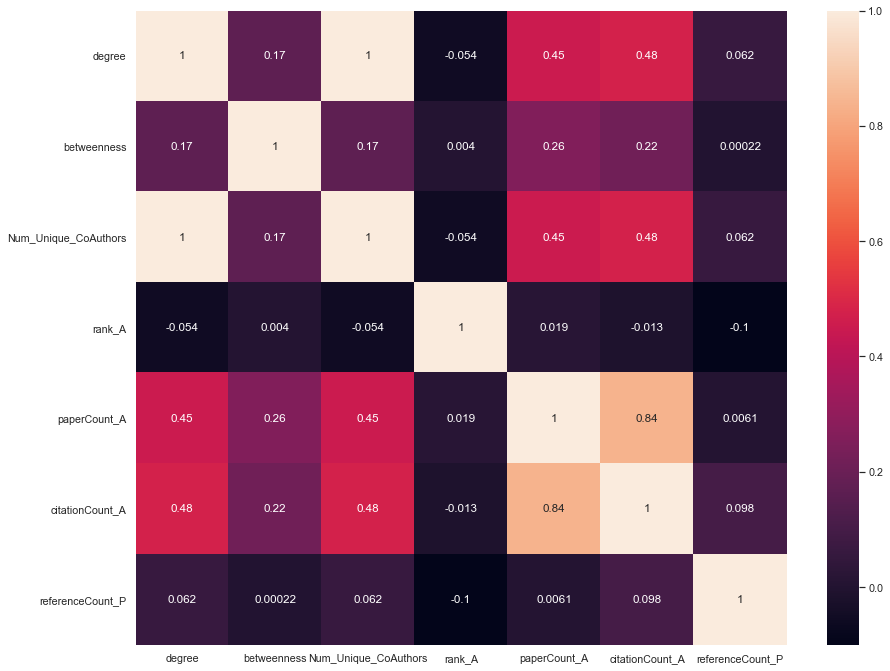

In [9]:
data.head()
plt.figure(figsize=(15, 12))
datacorr = final[final.columns[[2,3,8,13,14,15,18]]]
sns.heatmap(datacorr.corr(), annot=True);
print("\u0332".join("Author_Rank_Correlations"))
data.corr()['rank_A']